######################## brian_zebosi_python_assignment ####################################

 # Importing packages 

In [1]:
import seaborn as sns
import requests
import urllib
from Bio import SeqIO
from Bio.Alphabet import generic_dna, generic_rna, generic_nucleotide, generic_protein
from Bio.Data import CodonTable
from Bio.Seq import Seq
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
from Bio.SeqUtils import molecular_weight
import numpy as np
import matplotlib.pyplot as plt
import argparse
%matplotlib inline
import urllib.request
from Bio.SeqUtils import MeltingTemp as mt

# 1. 

In [2]:
def get_sequences_from_file(fasta_fn): #def keyword is used to define the function, 
   # get_sequences_from_file is the function name, fasta_fn in the () is the paramter/variable under test, 
    #: tells python whatever is after the line is part of the function  
    sequence_data_dict = {} # creating a empty dictionary 
    for record in SeqIO.parse(fasta_fn, "fasta"): # for loop :-  SeqIO.parse() function used to read sequence file as SeqRecord objects one at atime
        # two arguments in the () are input file = fasta_fn, file type = fasta i.e. fastn_fn will be read as fasta file
        description = record.description.split() 
        species_name = description[1] + " " + description[2] # creating species_names by joining description 1 & 2
        sequence_data_dict[species_name] = record.seq # in a dictionary, assigned species_name to record.seq 
    return(sequence_data_dict)

 # Importing datafile

In [3]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguin_df = pd.read_csv('penguins_mass.csv') # Includes only data for body mass 
species_list = list(penguin_df.species)

# 2

In [4]:
def translate_function(sequence):
    'function converts DNA sequence to amino acids while leaving the stop codons'
    gencode = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  # creates codon table 
    protein = ''
    for i in range(0,len(sequence),3): # for loop through every 3rd position
        codon = sequence[i:i+3]
        if codon in gencode.stop_codons: # do nothing if there is stop codon
            pass
        else :
            protein = protein + gencode.forward_table[codon]   # add amino acid to codon 
    return protein

In [5]:
Spheniscus_magellanicus = str(cytb_seqs['Spheniscus magellanicus']) # testing on one of the specie sequenceSpheniscus_magellanicus
translate_function(Spheniscus_magellanicus) # test if the function is working 

'MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHMCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMITGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFMLLLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLMPLLHKSKQRTMAFRPLSQLLFWTLVANLIILTWVGSQPVEHPFIIIGQLASFTYFTTLLILFPLAGALENKMLNH'

# 3

In [6]:
def translate_dna(sequence):
    'function converts DNA sequence to amino acids while leaving the stop codons using biopython' # using this link biopython.org/wiki/Seq to develop my function 
    dna_seq = Seq(sequence)
    protein_seq = dna_seq.translate(table = 2, to_stop = True)
    return protein_seq  

In [7]:
str(translate_dna(Spheniscus_magellanicus)) # test if the function is working

'MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHMCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMITGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFMLLLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLMPLLHKSKQRTMAFRPLSQLLFWTLVANLIILTWVGSQPVEHPFIIIGQLASFTYFTTLLILFPLAGALENKMLNH'

In [8]:
str(translate_function(Spheniscus_magellanicus)) == str(translate_dna(Spheniscus_magellanicus)) # comparing the two different functions (2 & 3)

True

# 4

In [9]:
def computed_molecular_weight(sequence):
    'function calculates molecular weight'
    aa_seq = ProteinAnalysis(sequence)
    mole_weight = aa_seq.molecular_weight()
    return(mole_weight)

In [10]:
computed_molecular_weight(Spheniscus_magellanicus) # test the function 

100902.60200000193

# 5

In [11]:
def gc_content(sequence):
    'function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence'
    nbases = sequence.count('n')+sequence.count('N') # Count 'N' or 'n' if available 
    gc_percent = float(sequence.count('C')+sequence.count('G'))*100.0/(len(sequence)-nbases) # remove N or n from GC ount
    return gc_percent  

In [12]:
gc_content(Spheniscus_magellanicus) # testing the function

48.20647419072616

#  -- In the MAIN part of the script --#

import the data or files

In [13]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguin_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguin_df.species)

# 6

In [14]:
penguin_df = pd.read_csv("penguins_mass.csv") 
penguin_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [15]:
penguin_df['molecular_weight'] = 'NaN' # adding molecular weight columm and assigning NaN values 
penguin_df['GC'] = 'NaN' # adding molecular weight columm and assigning NaN values 
penguin_df

,species,mass,molecular_weight,GC
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


# 7

In [16]:
penguincopied_df = penguin_df.copy() # making copy and will use it for bonus section 
penguincopied_df

,species,mass,molecular_weight,GC
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [17]:
penguin_df.columns.values # checking the colunm headers 

array(['species', 'mass', 'molecular_weight', 'GC'], dtype=object)

In [18]:
index = 0 #creates index at 0
for key,value in cytb_seqs.items():#for loop  through each key ,value to set cytb_seqs as a dictionary
    aa_sequence = translate_function(str(value)) #translate DNA nucleotides into aminio acids
    molecular_weight_cal = computed_molecular_weight(aa_sequence) # compute molecular weight
    GC_cal = gc_content(str(value)) # compute gc content from the dna sequence - value
    penguin_df.set_value(index,'GC', GC_cal) # 
    penguin_df.set_value(index,'molecular_weight', molecular_weight_cal)
    index += 1 # #increase index by one to move foward to the next row in the next loop
print(penguin_df)  
#  source guide for the code ' 
# http://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe'

                    species   mass molecular_weight       GC
0      Aptenodytes forsteri  28.00          42458.6  49.0814
1   Aptenodytes patagonicus  13.40          42475.6  50.8311
2       Eudyptes chrysocome   2.80          42431.5   48.294
3     Eudyptes chrysolophus   4.50          42595.9  47.1566
4         Eudyptes sclateri   4.25          42491.6  49.2563
5           Eudyptula minor   1.60          42563.7  49.6938
6        Pygoscelis adeliae   4.60          42445.5  50.9186
7     Pygoscelis antarctica   4.10          42399.6  49.2563
8          Pygoscelis papua   6.10          42459.6  48.2065
9       Spheniscus demersus   3.20          42459.6  48.3815
10     Spheniscus humboldti   4.75          42404.5   47.769
11  Spheniscus magellanicus   3.40          42475.6  51.1811


# 8

Text(0.5,1,' Mass against penguin spieces')

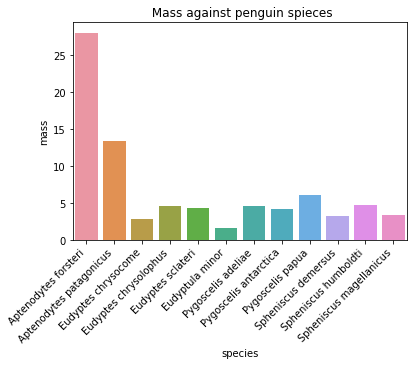

In [19]:
bar1 = sns.barplot(x = 'species', y= 'mass', data = penguin_df) # plot using seaborn
bar1.set_xticklabels(labels = penguin_df.species, rotation= 45, horizontalalignment='right')
bar1.set_title(' Mass against penguin spieces')

# 9

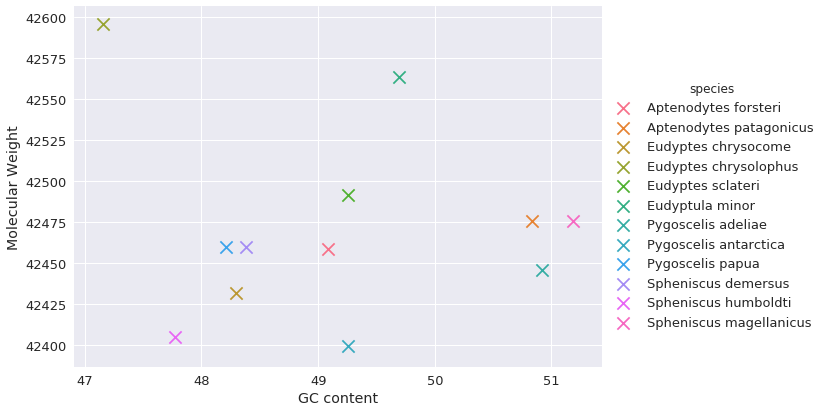

In [20]:
sns.set(font_scale=1.3)
bar2 = sns.lmplot(x = 'GC', y = 'molecular_weight', data= penguin_df, fit_reg=False, size=6, aspect = 1.5, scatter_kws={'alpha':1,"s": 150},hue='species',markers='x')
bar2.set_axis_labels('GC content', 'Molecular Weight')

# 10

In [21]:
penguin_df.to_csv('penguins_mass_cytb.csv', sep=',',index=False, encoding='utf-8', )

# 11

    my bonus question i wrote function to compute melting temperature based on GC content
    plot the relationship between GC content and temperature 

In [22]:
def compute_melting_temp(sequence):
    'function that calculates tm'
    aa_seq = str(Seq(sequence))
    TM = mt.Tm_GC(aa_seq)
    return TM

In [23]:
compute_melting_temp(Spheniscus_magellanicus) # testing function

78.8946123004108

In [24]:
penguincopied_df['TM'] = 'NaN' # create TM colunm and assigning NaN
penguincopied_df

,species,mass,molecular_weight,GC,TM
0,Aptenodytes forsteri,28.00,NaN,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN,NaN


In [25]:
index = 0 #creates index at 0
for key,value in cytb_seqs.items():#for loop  through each key ,value to set cytb_seqs as a dictionary
    aa_sequence = translate_function(str(value)) #translate DNA nucleotides into aminio acids
    molecular_weight_cal = computed_molecular_weight(aa_sequence) # compute molecular weight
    GC_cal = gc_content(str(value)) # compute gc content from the dna sequence - value
    tm_computed = compute_melting_temp(str(value))
    penguincopied_df.set_value(index,'GC', GC_cal) # 
    penguincopied_df.set_value(index,'molecular_weight', molecular_weight_cal)
    penguincopied_df.set_value(index,'TM', tm_computed)
    index += 1 # #increase index by one to move foward to the next row in the next loop
print(penguincopied_df) 

                    species   mass molecular_weight       GC       TM
0      Aptenodytes forsteri  28.00          42458.6  49.0814  79.2533
1   Aptenodytes patagonicus  13.40          42475.6  50.8311  79.9707
2       Eudyptes chrysocome   2.80          42431.5   48.294  78.9305
3     Eudyptes chrysolophus   4.50          42595.9  47.1566  78.4642
4         Eudyptes sclateri   4.25          42491.6  49.2563  79.3251
5           Eudyptula minor   1.60          42563.7  49.6938  79.5044
6        Pygoscelis adeliae   4.60          42445.5  50.9186  80.0066
7     Pygoscelis antarctica   4.10          42399.6  49.2563  79.3251
8          Pygoscelis papua   6.10          42459.6  48.2065  78.8946
9       Spheniscus demersus   3.20          42459.6  48.3815  78.9664
10     Spheniscus humboldti   4.75          42404.5   47.769  78.7153
11  Spheniscus magellanicus   3.40          42475.6  51.1811  80.1142


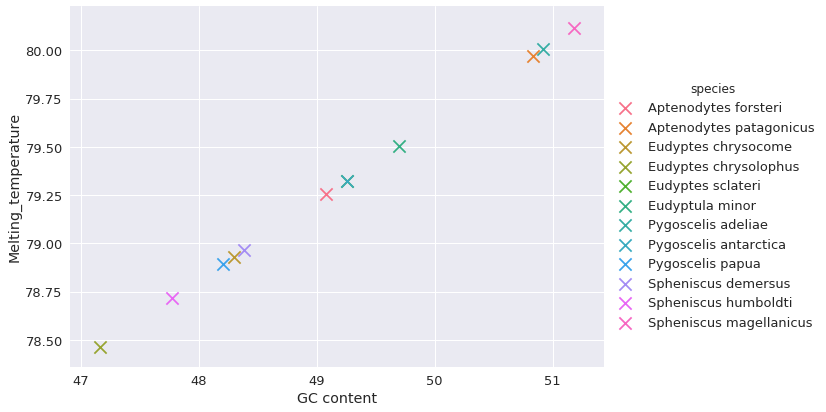

In [26]:
bar3 = sns.lmplot(x = 'GC', y= 'TM', data= penguincopied_df, fit_reg=False, size=6, aspect = 1.5, scatter_kws={'alpha':1,"s": 150},hue='species',markers='x')
bar3.set_axis_labels('GC content', 'Melting_temperature') 

#                                                 END